# Business Case: Pinky Telecom churn rate

Problématique:

Le but est de décrire les caractéristiques des clients ayant résilié et ce qui les distingue des autres clients. Puis tu devras proposer un scoring pour chaque client, afin de prioriser les appels vers les clients les plus à risque.

<u><b>RESPONSE and recomendation:</u></b>
We can point out 13 clients with 70% to 95% of risk to churn that Pinky commercials might approach to avoid them leaving. It's clients that are active for more than 4 months and for 16 months on average.
The majority is linked to an Internet DSL service .
The average of Monthly Charges of this group is above 60 euros and at least one, with the company for almost 5 years, is paying more than 100 euros a month.
At least 7 of our 13 high risk group live in a couple and 4 have dependents which shows that family/colective packages might be interesting for them.

From our analysis we can underline that a lot of the churn rate is linked to "Month-to-Month" type of contracts and internet clients without various extra services which could have helped to convince some to stay with Pinky services.

The majority of the 31% of churn clients apparently take decisions alone and don't have dependents. At least 75% of them quit before they complete 2 years with Pinky services.

To prevent the rise of this churn rate you can check this sensitive group under this lines:



In [1]:
#display(df_risk_clients)

----------------------------------------
# All the work done to reach our response:

## 1. Exploratory Data Analysis

In [2]:
########## The Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

########## ML models:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve

In [3]:
############### The Data Base

url = "https://github.com/FrMarques/WCSLyonData_ExoDataFiles/raw/refs/heads/main/churn_telecom.csv"

pinkyData = pd.read_csv(url)

In [4]:
pinkyData.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
#pinkyData["gender"].value_counts()
#pinkyData["SeniorCitizen"].value_counts()
#pinkyData["Partner"].value_counts()
pinkyData["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [6]:
pinkyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* There's 7043 lignes/clients and 21 columns;
* Only 3 columns are numeric;
* Apparently, there's no empty values;
* Clients personal features in Bolean values:
    - Gender: "Male" or "Female": (3555/3488);
    - SeniorCitizen: 0 and 1 (5901/1142);
    - Partner: "yes" or "no"(3402/3641);
    - Dependents; "yes" or "no" (2110/4933);

### Splitting clients by churn or not

In [7]:
pinkyData_churned = pinkyData[pinkyData["Churn"] == "Yes"]
pinkyData_clients = pinkyData[pinkyData["Churn"] == "No"]
display(f"The total of churned clients is: {pinkyData_churned.shape[0]}")
display(f"The total of active clients is {pinkyData_clients.shape[0]}")

'The total of churned clients is: 2219'

'The total of active clients is 4824'

### The Churn rate

In [8]:
# The churn_rate:
total_clients = pinkyData.shape[0]
churned_clients = pinkyData[pinkyData["Churn"] == "Yes"].shape[0]

pinkyChurn_rate = (churned_clients / total_clients) *100

print(f"The Pinky churn_rate is {pinkyChurn_rate: .2f} %")

The Pinky churn_rate is  31.51 %


## 2. DataViz
* Monyhly Charges and Tenure "moustaches" by Churn or Not Churn

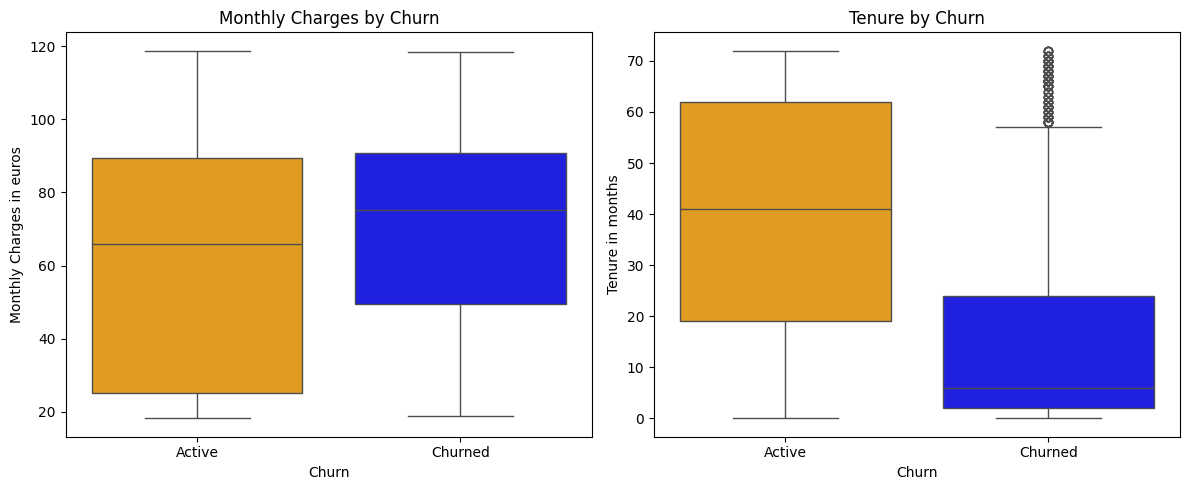

In [46]:
##### Creating a frame figure to accomodate two boxplots side by side:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns/plots

# 1st plot: "Monthly Charges" Boxplot by Churn:
sns.boxplot(data=pinkyData, x='Churn', y='MonthlyCharges', hue='Churn', ax=axes[0], 
            palette={0: "orange", 1: "blue"}, legend=False)
axes[0].set_title("Monthly Charges by Churn")
axes[0].set_ylabel("Monthly Charges in euros")

# 3nd plot: "Tenure" Boxplot by Churn:
sns.boxplot(data=pinkyData, x='Churn', y='tenure', hue='Churn', ax=axes[1], 
            palette={0: "orange", 1: "blue"}, legend=False)
axes[1].set_title("Tenure by Churn")
axes[1].set_ylabel("Tenure in months")

# Setting the ticks to add efficient labels to each "churn" value:
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Active", "Churned"])

axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Active", "Churned"])

plt.tight_layout()  # Styling up the figure layout;
plt.savefig("boxplots_churn_tenure.png", dpi=300, bbox_inches='tight') #option for PowerBi

plt.show()



* Looking at the ["MonthlyCharges"], we can see that most people (50%) quiting had a monthly cost of more than 50 euros to 90 euros, while more than 50% of the active clients pay less than 70 euros;
* On ["Tenure"], the time a client keeps Pinky's services, we can observe that the majority of people (more than 25%) that left did it before 10 months under contract with the overall average (50%) of the clients leaving did after 6 months or before (there's 25% that left before 2 months of contracts);
* We notice some "outliers", a minority, thet left after almost 5 years with Pinky services;
* Almost 75% of the churned clients left before 24 months/ 2 years which might be linked to the end of contracts and the traditional financial benefits of changing operators;

* More than about a third of the clients still under contract have it for more than 2 and half years and a bit of more than25% for more than 60 monyths/5 years;

### Comparing type of contracts overall, for churned clients and for active ones

In [10]:
df_contracts = pd.concat([
    pinkyData["Contract"].value_counts().rename("Total Clients"),
    pinkyData_churned["Contract"].value_counts().rename("Churned Clients")
], axis=1)

display(df_contracts)


,Total Clients,Churned Clients
Contract,,
Month-to-month,3875,1972
Two year,1695,65
One year,1473,182


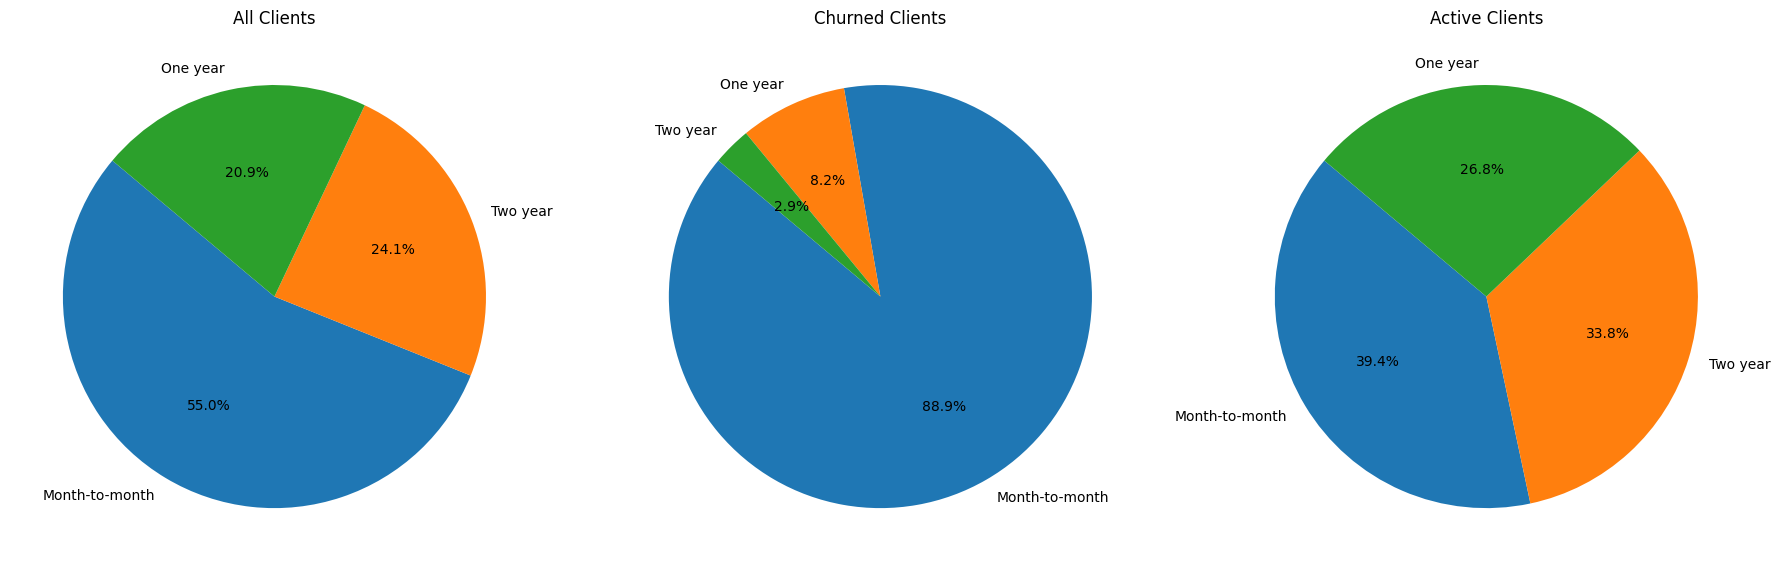

In [11]:
########### Watching the type of contracts overall and comparing churned with active clients:
contracts_total = pinkyData["Contract"].value_counts()
contracts_churned = pinkyData_churned["Contract"].value_counts()
contracts_active = pinkyData_clients["Contract"].value_counts()

########## Cooking 3 pies:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

titles = ["All Clients", "Churned Clients", "Active Clients"]
data = [contracts_total, contracts_churned, contracts_active]

for ax, title, contract_data in zip(axes, titles, data):
    ax.pie(contract_data, labels=contract_data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

plt.tight_layout()
plt.show()


* Most of the contracts of the 7043 clients were in a Month-to-Month basis;
* This dominant type of contract was used for almost 90% of the churned clients, maybe because it seems the most easy to end;
* For the active clients, Month-to-Month is also the prefered type of contract but the proportion is more balanced with on or two years contracts.
* As conclusion, we can notice that Month-to-Month contracts might not be the more beneficial to Pinky Telecom and we can recomend offering some benefits for longer types of contracts as a way to reduce the churn rate.   

### Multiple plots to compare the varios features with the churn/no churn

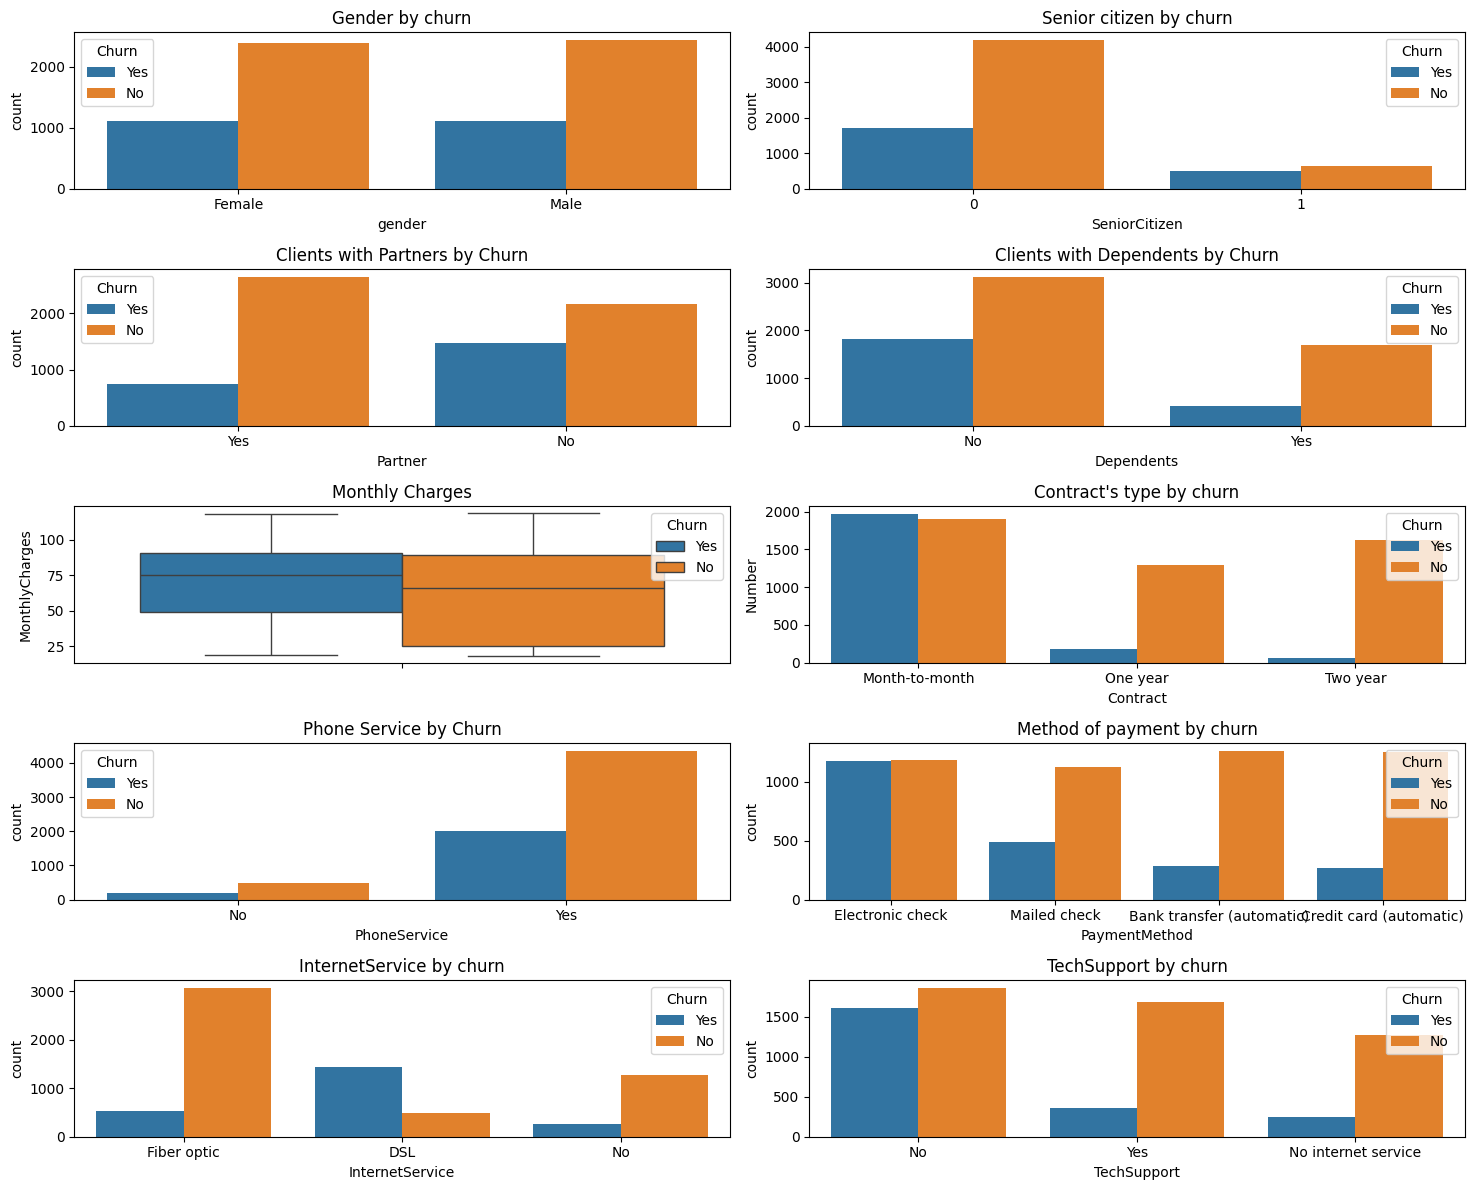

In [12]:
fig, axs = plt.subplots(5, 2, figsize=(15, 12))

sns.countplot(x="gender", data=pinkyData , hue="Churn", ax=axs[0, 0])
axs[0, 0].set_title("Gender by churn")

sns.countplot(x="SeniorCitizen", data=pinkyData , hue="Churn", ax=axs[0, 1])
axs[0, 1].set_title("Senior citizen by churn")

sns.countplot(x="Partner", data=pinkyData , hue="Churn", ax=axs[1, 0])
axs[1,0].set_title("Clients with Partners by Churn")

sns.countplot(x="Dependents", data=pinkyData , hue="Churn", ax=axs[1, 1])
axs[1,1].set_title("Clients with Dependents by Churn")

sns.boxplot(data=pinkyData, y='MonthlyCharges', hue='Churn',ax=axs[2, 0])
axs[2, 0].set_title('Monthly Charges')

sns.countplot(x="Contract", data=pinkyData , hue="Churn", ax=axs[2, 1])
axs[2, 1].set_title("Contract's type by churn")
axs[2, 1].set_ylabel('Number')

sns.countplot(x="PhoneService", data=pinkyData, hue="Churn", ax=axs[3, 0])
axs[3,0].set_title("Phone Service by Churn")

sns.countplot(x="PaymentMethod", data=pinkyData , hue="Churn", ax=axs[3, 1])
axs[3, 1].set_title("Method of payment by churn")

sns.countplot(x="InternetService", data=pinkyData , hue="Churn", ax=axs[4, 0])
axs[4, 0].set_title("InternetService by churn")

sns.countplot(x="TechSupport", data=pinkyData , hue="Churn", ax=axs[4, 1])
axs[4, 1].set_title("TechSupport by churn")

# Tightning layout to adjust plots to space:
plt.tight_layout()
plt.show()

* <u>Gender: doesn't seem to have a major impact in the Churn rate; </u>
* SeniorCitizen: Clients under 65 are the vast majority but the seniors (>65 years old) seem to be proportionally more open to leave;
* Clients with "no partner" seems more open to leave which can tell us that having someone to share the bills can benefit longer stays;  
* Clients with dependents (kids for example) are more willing to stay that the clients with no dependents;
* The "MonthlyCharges" between 50 and around 80 euros seems to have a huge impact in half of the churn;
* Clients on monthly "contracts" are a lot more open to "churn" than with other type of contracts;
* Almost all the clients have "PhoneService" and this have a significant impact in the churn rate;
* Electronic payments are linked to higher "churn" rates while "automatic" payments, problaly linked to longer contracts, have a lower quiting rate;
* Clients with "InternetService" with "ADSL" are a lot more willingly to "churn" while the "fiber" clients seem more satisfied;
* Internet clients with "no tech support" seems more willingly to quit which might signal the lack of extra services as a churn motif.

## 3. Preparing for Machine Learning to predict Churn risk

### Turning binary features into numeric (1 and 0)

In [13]:
########## Dictionary to map "yes" for 1 and "No" for 0:
binary_map = {'Yes': 1, 'No': 0}

########## List of binary columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

########## Apply conversion to all the columns in one hit:
for col in binary_cols:
    pinkyData[col] = pinkyData[col].map(binary_map).astype(int)

### One-Hot Encoding: turning categorical features into "dummies"

In [14]:
########## Apply One-Hot Encoding for the main categorical features:
pinkyData = pd.get_dummies(pinkyData, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

########## Apply One-Hot Encoding for aditional internet services (that includes "No internet service"):
internet_service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies']

pinkyData = pd.get_dummies(pinkyData, columns=internet_service_cols, drop_first=True)
# "Drop firts true" means that if the first "True" (or 1) value is found the others == 0 so the machine doesn't need all the options;


### Setting the index not to take it into the Machine Learning process

In [15]:
########## Setting 'customerID' as index:
pinkyData.set_index('customerID', inplace=True)

## 3.1 Supervised Machine Learning
## Training the models

In [16]:
########## Setting Features (X) and Target (y):
X = pinkyData.drop(columns=['Churn', 'gender', 'TotalCharges'])  # Removes target and unnecessary features;
y = pinkyData['Churn']  # Just the target;

In [17]:
########## checking if only numerical features in X;
print(X.dtypes.value_counts())

bool       21
int64       6
float64     1
Name: count, dtype: int64


### Split train (X) and test (y) teams

In [18]:
########## Spliting data in train ((80%) and test (20%) "teams":
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
# "stratify=y": keeps the same proportion of churn and active clients in both "teams".

In [19]:
########## Checking proportion of elements in each "team" to balance train and test:
print("Proportion in Train team (1== churn):")
print(y_train.value_counts(normalize=True))

print("\nProportion in Test team (1== churn):")
print(y_test.value_counts(normalize=True))

Proportion in Train team (1== churn):
Churn
0    0.684949
1    0.315051
Name: proportion, dtype: float64

Proportion in Test team (1== churn):
Churn
0    0.684883
1    0.315117
Name: proportion, dtype: float64


## 3.2 Logistic Regression

In [20]:
########## Generate and training model:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

########## Predictions
y_pred = model.predict(X_test)


* Checking the accuracy of thr LR model

In [21]:
########## Performing metrics:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8637331440738112

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       965
           1       0.84      0.70      0.76       444

    accuracy                           0.86      1409
   macro avg       0.86      0.82      0.83      1409
weighted avg       0.86      0.86      0.86      1409



* Confusion Matrix for LR model

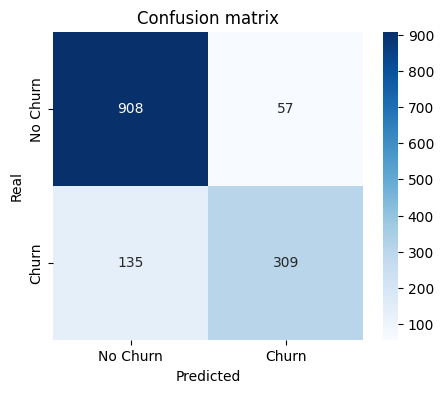

In [22]:
########## Generate a confusion matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion matrix')
plt.show()

* The Logistic Regression model correctly classified 908 "no churn" and 309 "churn" but failed in 135 that effectively left and with 57 that in reality are active. Going for better!

## 3.3 Random Forest

Accuracy: 0.865152590489709

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       965
           1       0.82      0.73      0.77       444

    accuracy                           0.87      1409
   macro avg       0.85      0.83      0.84      1409
weighted avg       0.86      0.87      0.86      1409



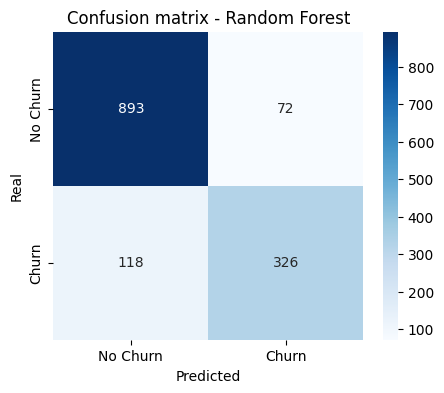

In [23]:
########## Build a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Generates and visualize the confusion matrix:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion matrix - Random Forest')
plt.show()

* The Random Forest model shows improvement classifying "no churn" clients but lost a bit of precision. There's still 118 clients predicted as "no churn" who have in reality left;

## 3.4 Grid Search for the Forest

In [24]:
### Setting the hyperparameters for otimization:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees:
    'min_samples_split': [2, 5, 10],  # Minimum of samples to to split a node;
    'min_samples_leaf': [1, 2, 4],  # Minimum of samples by leaf;
    'max_features': ['sqrt', 'log2']  # Number of variables to consider.
}

# Create the base model
rf_model = RandomForestClassifier(random_state=42)

# Setting up the GridSearchCV
grid_search_rf = GridSearchCV(
    rf_model, param_grid_rf, cv=3, scoring='f1', n_jobs=-1, verbose=2
)

# Training the GridSearchCV
grid_search_rf.fit(X_train, y_train)

print("Best hyperparameters:", grid_search_rf.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


## 3.5 Optimized Random Forest 
* with the new hyperparams but also a strong new feature

In [25]:
########### Adding "Month_to_Month" contract feature" to the "train" and "test" teams:
X_train = X_train.copy()
X_test = X_test.copy()

X_train['Is_Month_to_Month'] = (X_train['Contract_Two year'] == 0) & (X_train['Contract_One year'] == 0)
X_test['Is_Month_to_Month'] = (X_test['Contract_Two year'] == 0) & (X_test['Contract_One year'] == 0)


Random Forest Optimized - Accuracy: 0.8800567778566359

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       965
           1       0.84      0.76      0.80       444

    accuracy                           0.88      1409
   macro avg       0.87      0.85      0.86      1409
weighted avg       0.88      0.88      0.88      1409



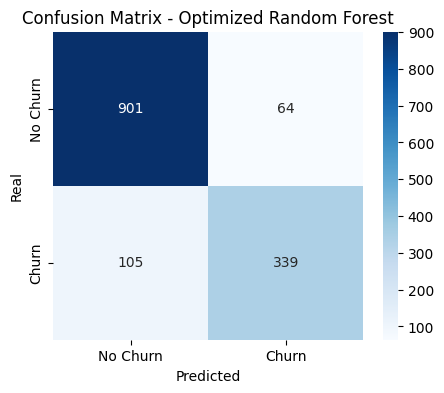

In [26]:
# Recreating the Random Forest otimized with the best hyperparams:
rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

# Treining the otimized model:
rf_best.fit(X_train, y_train)

# Make predictions with the otimlized model:
y_pred_rf_best = rf_best.predict(X_test)

# Evaluating the performance:
print("\nRandom Forest Optimized - Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))

# Correlation Matrix
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.show()


The new adjust improved the classification of "no churn"(906/872) but downgraded the desired results for "churn" (348/368//59 fakes against 93) but has also more fake "no churn". As the goal was to predict "churn" the later model adjustment seems to be the best.

## 3.6 Weight of features in churn rate

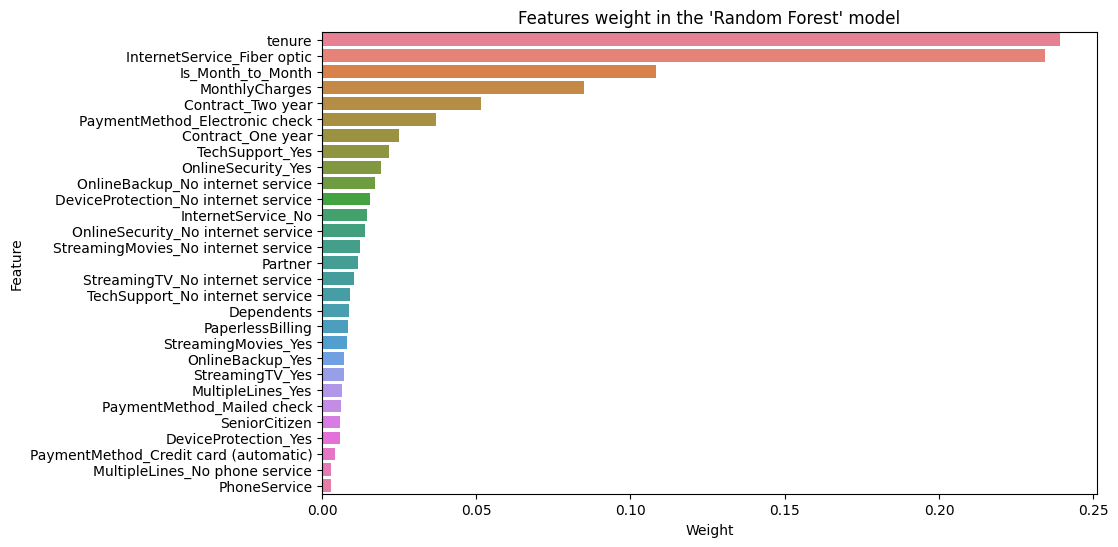

In [27]:
########## Updated importance of features in the updated model:
feature_importance_rf = rf_best.feature_importances_

# Creating a DataFrame to organize the results:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_rf})

# Sorting by the heavies weight:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, hue="Feature", dodge=False, legend=False)
plt.xlabel('Weight')
plt.title("Features weight in the 'Random Forest' model")
plt.show()


## 3.7 Comparing churn with active clients

In [28]:
num_pinkyData = pinkyData.drop(["gender", "TotalCharges"], axis=1)

In [29]:
print(pinkyData.dtypes.value_counts())
print(num_pinkyData.dtypes.value_counts())
print(X.dtypes.value_counts())

bool       21
int64       7
object      2
float64     1
Name: count, dtype: int64
bool       21
int64       7
float64     1
Name: count, dtype: int64
bool       21
int64       6
float64     1
Name: count, dtype: int64


In [30]:
# Split clients by churn:
churn_clients = num_pinkyData[num_pinkyData['Churn'] == 1]
active_clients = num_pinkyData[num_pinkyData['Churn'] == 0]

# Comparing medians of the main numeric features:
churn_summary = churn_clients.describe().T[['mean', 'std']]
active_summary = active_clients.describe().T[['mean', 'std']]

# Building a dataframe to help readability:
comparison_df = pd.concat([churn_summary, active_summary], axis=1)
comparison_df.columns = ['Churn_Mean', 'Churn_Std', 'NonChurn_Mean', 'NonChurn_Std']

comparison_df.head(10)


,Churn_Mean,Churn_Std,NonChurn_Mean,NonChurn_Std
SeniorCitizen,0.229383,0.420531,0.131219,0.337675
Partner,0.337539,0.472977,0.549959,0.497549
Dependents,0.183867,0.387463,0.352819,0.477897
tenure,15.572330,18.780267,40.098466,22.998230
PhoneService,0.906264,0.291527,0.901741,0.297695
PaperlessBilling,0.696260,0.459976,0.544362,0.498080
MonthlyCharges,69.709148,26.971656,62.485904,31.160680
Churn,1.000000,0.000000,0.000000,0.000000


* Looking at this last comparison, we can notice that almost 23% of the "churn" are senior clients which may signal a lack of offers adjusted to an older population;
* Clients with partners are more wingly to stay (55%) and also with dependents (35%) which may show the pertinence of packages for families;
* A massive part of churn (+90%) were phone service clients but also the "no churn" which may show that the internet clients might be more impactfull for the churn rate.

## 3.8 Predicting active clients in major risk of "churn"

In [31]:
########### Ensuring all the pertinent features are in the prediction dataframe:

# Adding "Is_Month_to_Month" to X before copying it:
X['Is_Month_to_Month'] = (X['Contract_Two year'] == 0) & (X['Contract_One year'] == 0)

X_for_prediction = X.copy()

# Ensuring the use of the same columns used in training by the model:
X_for_prediction = X_for_prediction[X_train.columns]

# Checking missing columns after all the work done:
missing_cols = [col for col in X_train.columns if col not in X_for_prediction.columns]
print("Absent columns in prediction:", missing_cols)

# Adding absent columns with value 0 to avoid dummies erors:
for col in missing_cols:
    X_for_prediction[col] = 0

Absent columns in prediction: []


In [32]:
# Applying the optimized 'Random Forest' to predict the risk of churn
pinkyData['Churn_risk'] = rf_best.predict_proba(X_for_prediction)[:, 1]

# Create a binary column based on agiven risk level:
pinkyData['Churn_predicted'] = (pinkyData['Churn_risk'] > 0.4).astype(int)


In [33]:
def get_high_risk_clients(dataframe, risk_threshold=0.7, min_tenure=4):
    """
    Returns a list of active clients showing signs of churn above the given risk level.

    Parameters:
    - dataframe: DataFrame with the clients data;
    - risk_threshold: Churn risk level (default: 0.7).
    - min_tenure: Minimum tenure under contract to be considered (default: 4 months).

    Returns:
    - DataFrame with high risk clients.
    """

    # Resetting the index to ensure that "customerID" is accessible:
    dataframe = dataframe.reset_index()

    # Filter active clients with high churn risk:
    high_risk_clients = dataframe[
        (dataframe["Churn"] == 0) &  # Only active clients;
        (dataframe["tenure"] > min_tenure) &  # Minimum active months/tenure;
        (dataframe["Churn_risk"] > risk_threshold)  # High risk minimum level to reengage with clients;
    ]

    # Select relevant columns to show:
    return high_risk_clients[[
        "customerID", "Churn_risk"
    ]].sort_values(by="Churn_risk", ascending=False)

# Apply the function with a threshold of 70%:
df_risk_clients = get_high_risk_clients(pinkyData, risk_threshold=0.6, min_tenure=4)

In [34]:
print(df_risk_clients.shape)
display(df_risk_clients.head())

(30, 2)


,customerID,Churn_risk
4355,0096-BXERS,0.855824
6055,6599-SFQVE,0.807702
3833,9169-BSVIN,0.788557
298,2985-JUUBZ,0.787376
4042,5404-GGUKR,0.760267


* According to the predictions of our best model, these are active clients in higher risk of leaving Pinky

## 3.9 Active Clients in churn risk ".to_csv"

In [35]:
df_risk_clients.to_csv("pinky_churn_high_risk_clients.csv")

In [36]:
df_pinky_risk_clients = pd.merge(df_risk_clients, pinkyData_clients, on="customerID", how="left" )

In [37]:
print(df_pinky_risk_clients.shape)
display(df_pinky_risk_clients.head(3))
display(df_pinky_risk_clients.sample(3))
display(df_pinky_risk_clients.tail(3))

(30, 22)


,customerID,Churn_risk,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0096-BXERS,0.855824,Female,0,Yes,No,6,Yes,Yes,DSL,...,No,No,No,No,Month-to-month,No,Electronic check,50.35,314.55,No
1,6599-SFQVE,0.807702,Female,0,No,No,6,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.00,340.4,No
2,9169-BSVIN,0.788557,Male,0,No,No,12,Yes,Yes,DSL,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),74.75,827.05,No


,customerID,Churn_risk,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,1329-VHWNP,0.621571,Female,0,No,No,7,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),25.05,189.95,No
24,8242-JSVBO,0.611738,Male,0,No,No,7,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.65,322.5,No
23,8873-GLDMH,0.611754,Female,0,No,No,6,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,73.85,401.3,No


,customerID,Churn_risk,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
27,0212-ISBBF,0.604482,Female,0,No,No,22,No,No phone service,DSL,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.35,1098.85,No
28,6198-ZFIOJ,0.602088,Female,0,No,No,5,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,No,Electronic check,75.60,402.5,No
29,9281-PKKZE,0.600660,Female,0,Yes,No,46,No,No phone service,DSL,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,43.95,2007.85,No


In [38]:
df_pinky_risk_clients.to_csv("pinky_risk_clients_features.csv")